In [1]:
# import main libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
# get and print the dataset
from ucimlrepo import fetch_ucirepo
import pandas as pd
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets
dataset = pd.DataFrame(X)
dataset['target'] = y

print(dataset.shape)
print(dataset.describe())

(253680, 22)
              HighBP       HighChol      CholCheck            BMI  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.429001       0.424121       0.962670      28.382364   
std         0.494934       0.494210       0.189571       6.608694   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  253680.000000  253680.000000         253680.000000  253680.000000   
mean        0.443169       0.040571              0.094186       0.756544   
std         0.496761       0.197294              0.292087       0.429169   
min         0.000000       0.000000              0.000000    

In [3]:
# convert data to integers
dataset['Diabetes_binary'] = dataset['Diabetes_binary'].astype('int')
dataset['HighBP'] = dataset['HighBP'].astype('int')
dataset['HighChol'] = dataset['HighChol'].astype('int')
dataset['CholCheck'] = dataset['CholCheck'].astype('int')
dataset['BMI'] = dataset['BMI'].astype('int')
dataset['Smoker'] = dataset['Smoker'].astype('int')
dataset['Stroke'] = dataset['Stroke'].astype('int')
dataset['HeartDiseaseorAttack'] = dataset['HeartDiseaseorAttack'].astype('int')
dataset['PhysActivity'] = dataset['PhysActivity'].astype('int')
dataset['Fruits'] = dataset['Fruits'].astype('int')
dataset['Veggies'] = dataset['Veggies'].astype('int')
dataset['HvyAlcoholConsump'] = dataset['HvyAlcoholConsump'].astype('int')
dataset['AnyHealthcare'] = dataset['AnyHealthcare'].astype('int')
dataset['NoDocbcCost'] = dataset['NoDocbcCost'].astype('int')
dataset['GenHlth'] = dataset['GenHlth'].astype('int')
dataset['MentHlth'] = dataset['MentHlth'].astype('int')
dataset['PhysHlth'] = dataset['PhysHlth'].astype('int')
dataset['DiffWalk'] = dataset['DiffWalk'].astype('int')
dataset['Sex'] = dataset['Sex'].astype('int')
dataset['Age'] = dataset['Age'].astype('int')
dataset['Education'] = dataset['Education'].astype('int')
dataset['Income'] = dataset['Income'].astype('int')

print(dataset.head())

   Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                0       1         1          1   40       1       0   
1                0       0         0          0   25       1       0   
2                0       1         1          1   28       0       0   
3                0       1         0          1   27       0       0   
4                0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             0       0  ...              1   
1                     0             1       0  ...              0   
2                     0             0       1  ...              1   
3                     0             1       1  ...              1   
4                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        5        18        15         1    0    9          4

In [4]:
# lsit of features
features = [
    'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
    'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'
]
# check for empty cells
dataset.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
# find if any binary columns have anything they shouldn't
print("Features w non 0 or 1 vals in the data: \n")
for feature in feature:
    if not dataset[feature].isin([0, 1]).all():
        print(f"Colmn '{feature}' has non 0/1 values")

Features with non 0/1 values in the dataset: 

Column 'BMI' contains non 0/1 values.
Column 'GenHlth' contains non 0/1 values.
Column 'MentHlth' contains non 0/1 values.
Column 'PhysHlth' contains non 0/1 values.
Column 'Age' contains non 0/1 values.
Column 'Education' contains non 0/1 values.
Column 'Income' contains non 0/1 values.


In [6]:
# prepare the dataset
from sklearn.model_selection import train_test_split
answers = dataset['Diabetes_binary']
data = dataset.drop(['Diabetes_binary'], axis=1)
# data = dataset.drop(['Diabetes_binary', 'Income', 'Education', 'MentHlth'], axis=1)


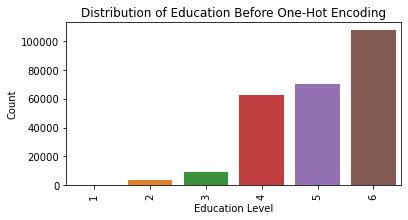

In [7]:
# graph of education distribution
plt.figure(figsize=(6, 3))
sns.countplot(x='Education', data=dataset)
plt.title('Distribution of Education Before One-Hot Encoding')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [8]:
# one-hot encoding
categorical_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
# categorical_features = ['BMI', 'GenHlth', 'PhysHlth', 'Age',]
encoded_data = pd.get_dummies(data, columns=categorical_features)
dataset.drop(columns=categorical_features, inplace=True)
dataset = pd.concat([dataset, encoded_data], axis=1)

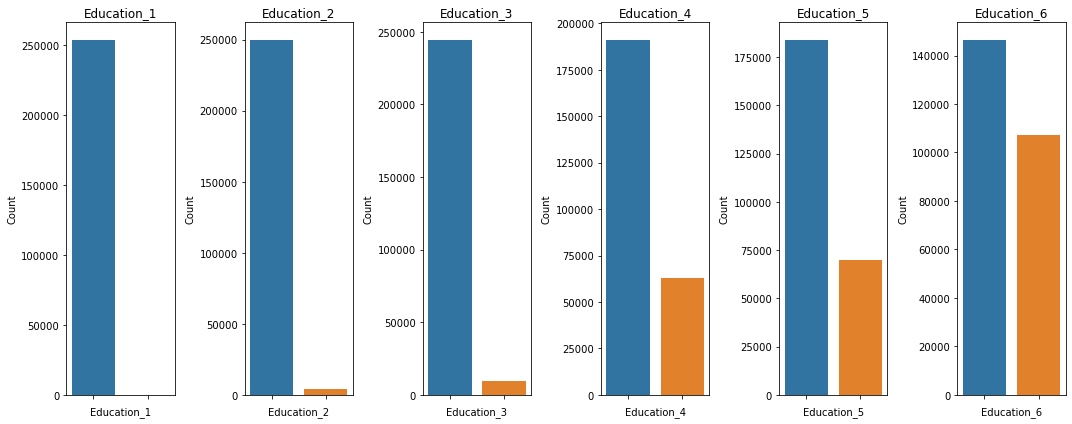

In [9]:
# graph after onehot

education_encoded_cols = [col for col in dataset.columns if col.startswith('Education_')]
fig, axes = plt.subplots(nrows=1, ncols=len(education_encoded_cols), figsize=(15, 6))

for i, col in enumerate(education_encoded_cols):
    sns.countplot(x=col, data=dataset, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('Count')
    axes[i].set_xticklabels([]) 

plt.tight_layout()
plt.show()


In [10]:
# split data into testset and training set
temp_training_set, test_set, temp_training_ans, test_ans = train_test_split(
    data, answers, test_size=0.3, random_state=34)
# create validation set
training_set, validation_set, training_ans, validation_ans = train_test_split(
    temp_training_set, temp_training_ans, test_size=0.2, random_state=34)
# training size = 56%, validation=14%, test=30%  

print("dataset:", encoded_data.shape,
      "training set:", training_set.shape,
      "testing set:", test_set.shape,
      "validation set:", validation_set.shape
     )
# print(encoded_data.describe())

dataset: (253680, 192) training set: (142060, 21) testing set: (76104, 21) validation set: (35516, 21)


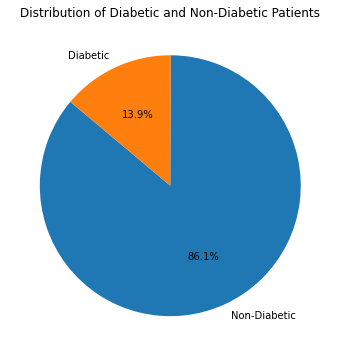

In [11]:
# Counting diabetic and non-diabetic patients
diabetic_num= dataset['Diabetes_binary'].value_counts()

# pie chart
plt.figure(figsize=(8, 6))
plt.pie(diabetic_num, labels=['Non-Diabetic', 'Diabetic'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diabetic and Non-Diabetic Patients')
plt.show()

C = 0.0001:
  Accuracy: 0.7222941772722153
  F1 Score for class 0: 0.8180090414244856
  F1 Score for class 1: 0.41420680643820157

C = 0.00026366508987303583:
  Accuracy: 0.7218999887374704
  F1 Score for class 0: 0.8177305357175811
  F1 Score for class 1: 0.4135842783352134

C = 0.0006951927961775605:
  Accuracy: 0.7219844577092015
  F1 Score for class 0: 0.817789260011072
  F1 Score for class 1: 0.4137275857974113

C = 0.0018329807108324356:
  Accuracy: 0.7219844577092015
  F1 Score for class 0: 0.817789260011072
  F1 Score for class 1: 0.4137275857974113

C = 0.004832930238571752:
  Accuracy: 0.7220126140331118
  F1 Score for class 0: 0.8178110756398664
  F1 Score for class 1: 0.4137521524850068

C = 0.012742749857031334:
  Accuracy: 0.7219844577092015
  F1 Score for class 0: 0.8177959846471804
  F1 Score for class 1: 0.41365795724465554

C = 0.03359818286283781:
  Accuracy: 0.7219844577092015
  F1 Score for class 0: 0.8177959846471804
  F1 Score for class 1: 0.41365795724465554

C 

/Users/pulindufonseka/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C = 4.281332398719396:
  Accuracy: 0.7219844577092015
  F1 Score for class 0: 0.8177959846471804
  F1 Score for class 1: 0.41365795724465554



/Users/pulindufonseka/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C = 11.288378916846883:
  Accuracy: 0.7220407703570222
  F1 Score for class 0: 0.8178463355229167
  F1 Score for class 1: 0.4136374435732953



/Users/pulindufonseka/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C = 29.763514416313132:
  Accuracy: 0.7220970830048429
  F1 Score for class 0: 0.8179235537190083
  F1 Score for class 1: 0.41333808844507847



/Users/pulindufonseka/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C = 78.47599703514607:
  Accuracy: 0.7103558959342269
  F1 Score for class 0: 0.8075937529224727
  F1 Score for class 1: 0.41441338874025163



/Users/pulindufonseka/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C = 206.913808111479:
  Accuracy: 0.6825937605586214
  F1 Score for class 0: 0.7836899165307494
  F1 Score for class 1: 0.4040809853570863



/Users/pulindufonseka/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C = 545.5594781168514:
  Accuracy: 0.7191125126703457
  F1 Score for class 0: 0.8185588010621658
  F1 Score for class 1: 0.37844236760124605



/Users/pulindufonseka/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C = 1438.44988828766:
  Accuracy: 0.6598997634868792
  F1 Score for class 0: 0.7742960180877103
  F1 Score for class 1: 0.3103625463888096



/Users/pulindufonseka/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C = 3792.690190732246:
  Accuracy: 0.6270413334835004
  F1 Score for class 0: 0.7392930247205164
  F1 Score for class 1: 0.3450356012658227



/Users/pulindufonseka/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C = 10000.0:
  Accuracy: 0.67121860569884
  F1 Score for class 0: 0.7921835234654471
  F1 Score for class 1: 0.2132991982752813



NameError: name 'train_accuracies' is not defined

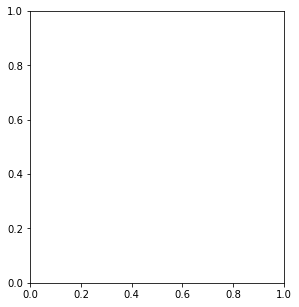

In [12]:
# SVC hyperparameter tuning
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

C_vals = np.logspace(-4, 4, 20)
smote = SMOTE(random_state=42)

# SMOTE on training data
X_train_smote, y_train_smote = smote.fit_resample(training_set, training_ans)
for C in C_vals:
    linear_svc = make_pipeline(StandardScaler(), LinearSVC(C=C, max_iter=10000, random_state=42))
    linear_svc.fit(X_train_smote, y_train_smote)

    validation_preds = linear_svc.predict(validation_set)
    accuracy = accuracy_score(validation_ans, validation_preds)
    f1_scores = f1_score(validation_ans, validation_preds, average=None) 

    # Print
    print(f"C = {C}:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score for class 0: {f1_scores[0]}")
    print(f"F1 Score for class 1: {f1_scores[1]}\n")


# Plotting
plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.semilogx(C_vals, train_accuracies, label='Training Accuracy')
plt.semilogx(C_vals, validation_accuracies, label='Validation Accuracy')
plt.title('Accuracy/C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.semilogx(C_vals, train_f1_scores, label='Training F1 Score')
plt.semilogx(C_vals, validation_f1_scores, label='Validation F1 Score')
plt.title('F1 Score/C')
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
# optimised Linear SVC
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

# split data
interim_train_set, testing_set, interim_train_ans, testing_ans = train_test_split(data, answers, test_size=0.2, random_state=42)
training_set, validation_set, training_ans, validation_ans = train_test_split(interim_train_set, interim_train_ans, test_size=0.25, random_state=42) 

# smote
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(training_set, training_ans)

# SVC
linear_svc = make_pipeline(StandardScaler(), LinearSVC(C=0.004832930238571752, max_iter=10000, random_state=42))
linear_svc.fit(X_train_smote, y_train_smote)

validation_predictions = linear_svc.predict(validation_set)
validation_accuracy = accuracy_score(validation_ans, validation_predictions)
validation_f1_scores = f1_score(validation_ans, validation_predictions, average=None)  
test_predictions = linear_svc.predict(testing_set)
test_accuracy = accuracy_score(testing_ans, test_predictions)
test_f1_scores = f1_score(testing_ans, test_predictions, average=None) 

print(f"Validation Accuracy: {validation_accuracy}")
print(f"Validation F1 Score for class 0: {validation_f1_scores[0]}")
print(f"Validation F1 Score for class 1: {validation_f1_scores[1]}")

print(f"Test Accuracy: {test_accuracy}")
print(f"Test F1 Score for class 0: {test_f1_scores[0]}")
print(f"Test F1 Score for class 1: {test_f1_scores[1]}")


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
training_set_scaled = scaler.fit_transform(training_set)
testing_set_scaled = scaler.transform(testing_set)
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(training_set_scaled, training_ans)

testing_pred = knn.predict(testing_set_scaled)
accuracy = accuracy_score(testing_ans, testing_pred)
print(f"Accuracy: {accuracy}")
print("classification report:")
print(classification_report(testing_ans, testing_pred))



In [13]:
# confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
cm = confusion_matrix(testing_ans, testing_pred)


cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix Heatmap')
plt.show()



NameError: name 'testing_ans' is not defined

In [ ]:
# knn tuning
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

f1_scores_zero = []
f1_scores_one = []
accuracies = []

for n in range(1, 61):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(training_set_scaled, training_ans)
    predictions = knn.predict(testing_set_scaled)

    # f1 score
    f1_scores = f1_score(testing_ans, predictions, average=None) 
    accuracy = accuracy_score(testing_ans, predictions)
    f1_scores_zero.append(f1_scores[0])
    f1_scores_one.append(f1_scores[1])
    accuracies.append(accuracy)
    
    print(f"n neighbors = {n}: F1 Score(0) = {f1_scores[0]:.2f}, F1 Score(1) = {f1_scores[1]:.2f}, Accuracy = {accuracy:.2f}")

# plot
plt.figure(figsize=(6, 3))
plt.plot(range(1, 61), f1_scores_zero, label='F1 Score (0)', color='blue')
plt.plot(range(1, 61), f1_scores_one, label='F1 Score (1)', color='red')
plt.plot(range(1, 61), accuracies, label='Accuracy', color='green')
plt.title('F1 Scores and Accuracy/num of Neighbors')
plt.xlabel('num of neighbors')
plt.ylabel('skore')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# rand forest


In [ ]:
# rand forest#
